In [1]:
import numpy as np
import torch
from src import get_args

CFG_FILE = 'cfgs/default.yml'
task_info = get_args(CFG_FILE)

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.8 from "/Users/mateusz/Desktop/kwanty/ex/venv/bin/python"
  * The NumPy version is: "1.23.3"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Users/mateusz/Desktop/kwanty/ex/venv/lib/python3.8/site-packages/numpy/core/_multiarray_umath.cpython-38-darwin.so, 0x0002): tried: '/Users/mateusz/Desktop/kwanty/ex/venv/lib/python3.8/site-packages/numpy/core/_multiarray_umath.cpython-38-darwin.so' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/usr/local/lib/_multiarray_umath.cpython-38-darwin.so' (no such file), '/usr/lib/_multiarray_umath.cpython-38-darwin.so' (no such file)


In [2]:
from src import DataSet
Data_manager = DataSet(paths=task_info['DATA_PATH'])
data_train = Data_manager.train[:, 1:]
data_val = Data_manager.val[:, 1:]

[INFO] Data:
train: 105105 points
val: 45045
test: 13860
Header: ['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku', 'units_sold']


In [3]:
weeks = Data_manager.data_merged[:, 1]
store_ids = Data_manager.data_merged[:, 2]
sku_ids = Data_manager.data_merged[:, 3]
unq_weeks = np.unique(weeks, return_counts=True)
unq_store_ids = np.unique(store_ids, return_counts=True)
unq_sku_ids = np.unique(sku_ids, return_counts=True)
print(f'Dates to encode: {unq_weeks[0].shape}')
print(f'Store ids to encode: {unq_store_ids[0].shape}')
print(f'Item ids to encode: {unq_sku_ids[0].shape}')
unq_weeks

Dates to encode: (130,)
Store ids to encode: (76,)
Item ids to encode: (28,)


(array(['01/01/13', '01/05/12', '01/08/11', '02/01/12', '02/04/13',
        '02/05/11', '02/07/13', '02/10/12', '03/04/12', '03/07/12',
        '03/10/11', '04/04/11', '04/06/13', '04/07/11', '04/09/12',
        '04/12/12', '05/02/13', '05/03/13', '05/06/12', '05/09/11',
        '05/12/11', '06/02/12', '06/03/12', '06/06/11', '06/11/12',
        '07/02/11', '07/03/11', '07/05/13', '07/08/12', '07/11/11',
        '08/01/13', '08/05/12', '08/08/11', '09/01/12', '09/04/13',
        '09/05/11', '09/07/13', '09/10/12', '10/04/12', '10/07/12',
        '10/10/11', '11/04/11', '11/06/13', '11/07/11', '11/09/12',
        '11/12/12', '12/02/13', '12/03/13', '12/06/12', '12/09/11',
        '12/12/11', '13/02/12', '13/03/12', '13/06/11', '13/11/12',
        '14/02/11', '14/03/11', '14/05/13', '14/08/12', '14/11/11',
        '15/01/13', '15/05/12', '15/08/11', '16/01/12', '16/04/13',
        '16/05/11', '16/10/12', '17/01/11', '17/04/12', '17/07/12',
        '17/10/11', '18/04/11', '18/06/13', '18/

In [4]:
d_unsh = Data_manager.data_unshuffled
week_data = {'11': np.zeros((13, 32)), '12': np.zeros((13, 32)), '13': np.zeros((13, 32))}
for row in d_unsh:
    week_data[row[1][-2:]][int(row[1].split('/')[1])][int(row[1].split('/')[0])] += row[-1]

In [5]:
s = np.sum(week_data['11']) + np.sum(week_data['12']) + np.sum(week_data['13'])
monthly = {'11': np.sum(week_data['11'], axis=1)[1:],
           '12': np.sum(week_data['12'], axis=1)[1:],
           '13': np.sum(week_data['13'], axis=1)[1:]}
monthly['13'] = np.where(monthly['13'] == 0, np.nan, monthly['13'])
monthly

{'11': array([168248., 331002., 232101., 207802., 307252., 232109., 218148.,
        301846., 205348., 296717., 243219., 287593.]),
 '12': array([301982., 235313., 233621., 211379., 365665., 233042., 268851.,
        234240., 210041., 293104., 221032., 263616.]),
 '13': array([274313., 271870., 230327., 274227., 246744., 228374., 129756.,
            nan,     nan,     nan,     nan,     nan])}

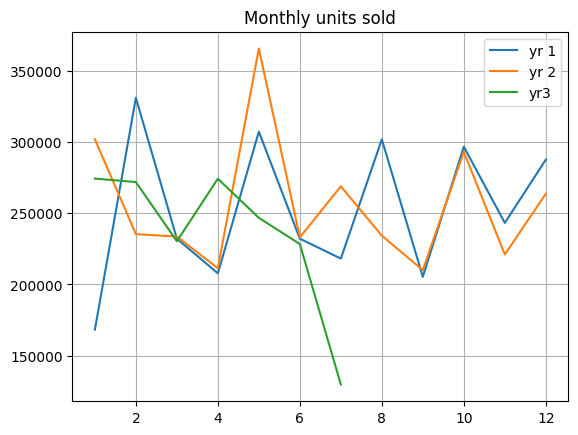

In [6]:
import matplotlib.pyplot as plt
mts = list(range(1, 13))
plt.plot(mts, monthly['11'], label='yr 1')
plt.plot(mts, monthly['12'], label='yr 2')
plt.plot(mts, monthly['13'], label='yr3')
plt.title('Monthly units sold')
plt.legend()
plt.grid()
plt.show()

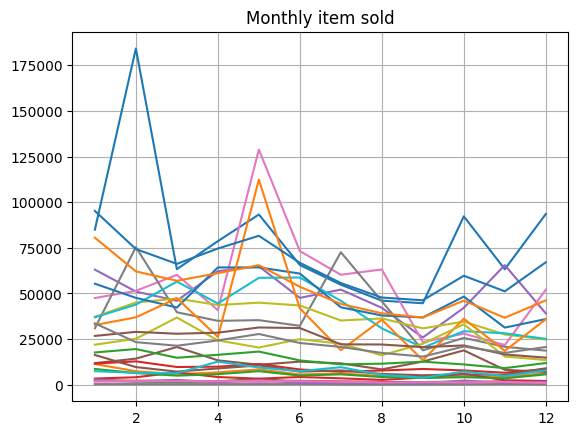

In [7]:
items = [x[3] for x in d_unsh]
items = list(set(items))
item_week = {}
for item in items:
    item_week[item] = np.zeros((13, 32))

for row in d_unsh:
    item_week[row[3]][int(row[1].split('/')[1])][int(row[1].split('/')[0])] += row[-1]
#%%
for key in item_week.keys():
    item_week[key] = np.sum(item_week[key], axis=1)[1:]

for key in item_week.keys():
    plt.plot(mts, item_week[key])

plt.title('Monthly item sold')
plt.grid()
plt.show()

In [8]:
items = [x[3] for x in d_unsh]
items = list(set(items))
item_week = {}
for item in items:
    item_week[item] = np.zeros((3, 13, 32))

for row in d_unsh:
    year = int(row[1].split('/')[2]) - 11
    item_week[row[3]][year][int(row[1].split('/')[1])][int(row[1].split('/')[0])] += row[-1]
#%%
for key in item_week.keys():
    item_week[key] = np.sum(item_week[key], axis=2)[:, 1:]

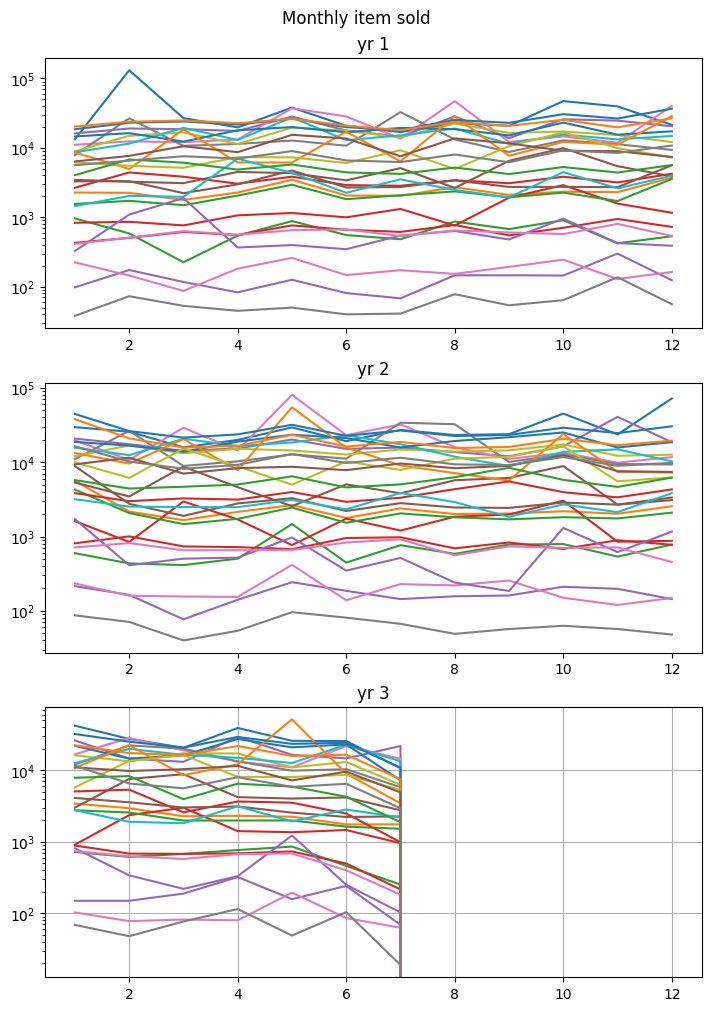

In [9]:
fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(7, 10))

for key in item_week.keys():
    axs[0].plot(mts, item_week[key][0, :])
    axs[1].plot(mts, item_week[key][1, :])
    axs[2].plot(mts, item_week[key][2, :])

fig.suptitle('Monthly item sold')
axs[0].set_title('yr 1')
axs[1].set_title('yr 2')
axs[2].set_title('yr 3')
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[2].set_yscale('log')
plt.grid()
plt.show()

{219009: 964194.0, 217217: 75241.0, 300291: 20103.0, 398721: 46178.0, 222087: 601228.0, 245387: 150161.0, 223245: 650165.0, 219029: 450563.0, 216233: 450420.0, 222765: 478596.0, 217390: 567046.0, 223153: 455473.0, 217777: 64721.0, 378934: 109909.0, 673209: 4929.0, 219844: 98434.0, 327492: 5171.0, 545621: 1980.0, 245338: 276325.0, 547934: 88008.0, 216418: 786087.0, 216419: 628711.0, 320485: 166902.0, 546789: 21988.0, 600934: 19632.0, 216425: 291885.0, 679023: 19442.0, 300021: 265390.0}


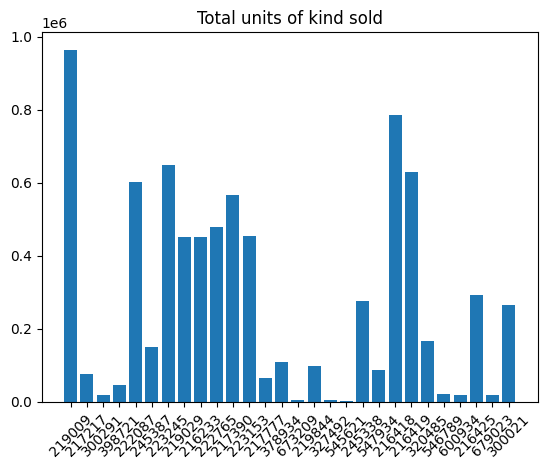

In [10]:
item_total = {}
for item in items:
    item_total[item] = 0
for key in item_week.keys():
    item_total[key] = np.sum(item_week[key])
print(item_total)

x = [str(x) for x in list(item_total.keys())]
y = list(item_total.values())
plt.bar(x, y)
plt.xticks(rotation=45)
plt.title('Total units of kind sold')
plt.show()